Dataset loaded successfully!

--- Initial Data Overview ---
          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  è®°å½æ°               Order.Date        Order.ID  ...  \
0       0.0     US          1  2011-01-07 00:00:00.000  CA-2011-130813  ...   
1       0.0     US          1  2011-01-21 00:00:00.000  CA-2011-148614  ...   
2       0.0     US          1  2011-08-05 00:00:00.000  CA-2011-118962  ...   
3       0.0     US          1  2011-08-05 00:00:00.000  CA-2011-118962  ...   
4       0.0     US          1  2011-09-29 00:00:00.000  CA-2011-

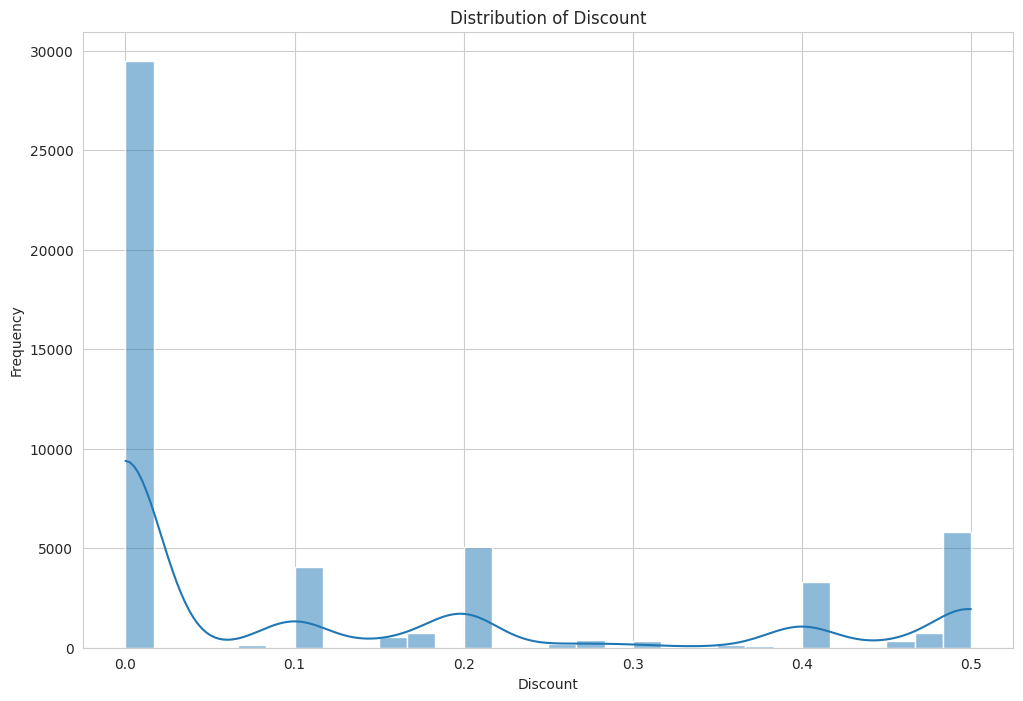

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


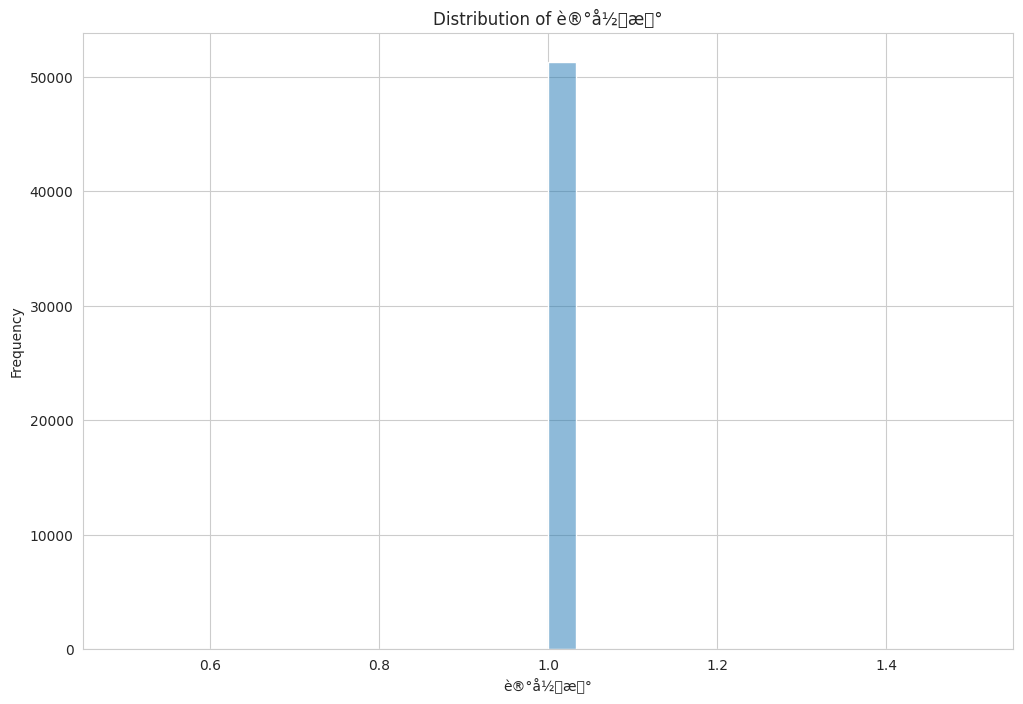

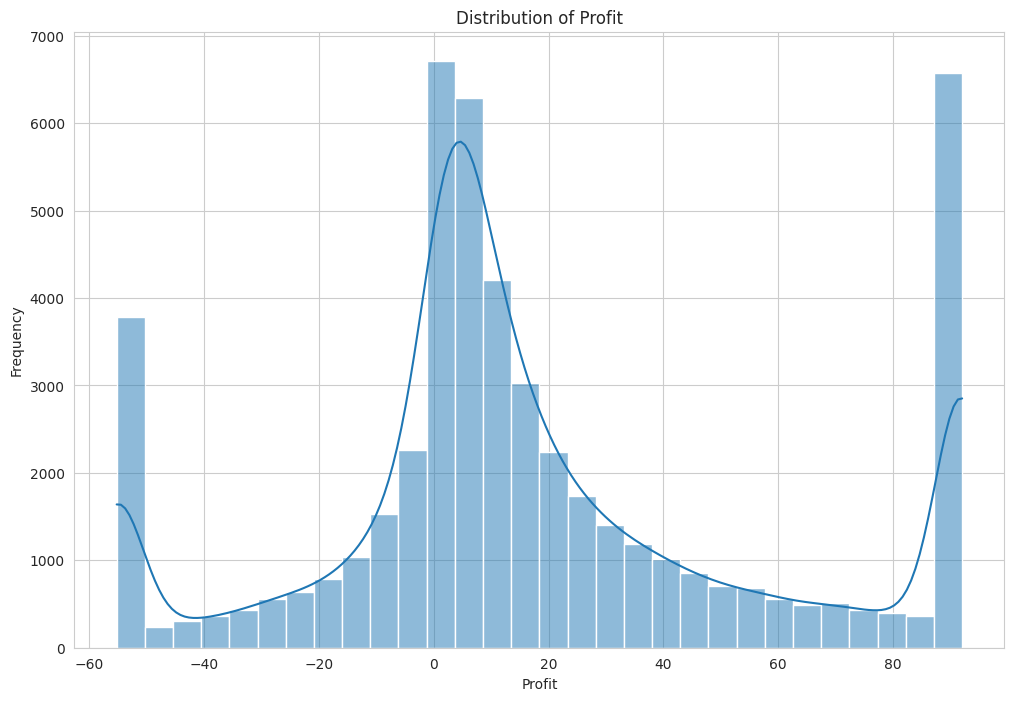

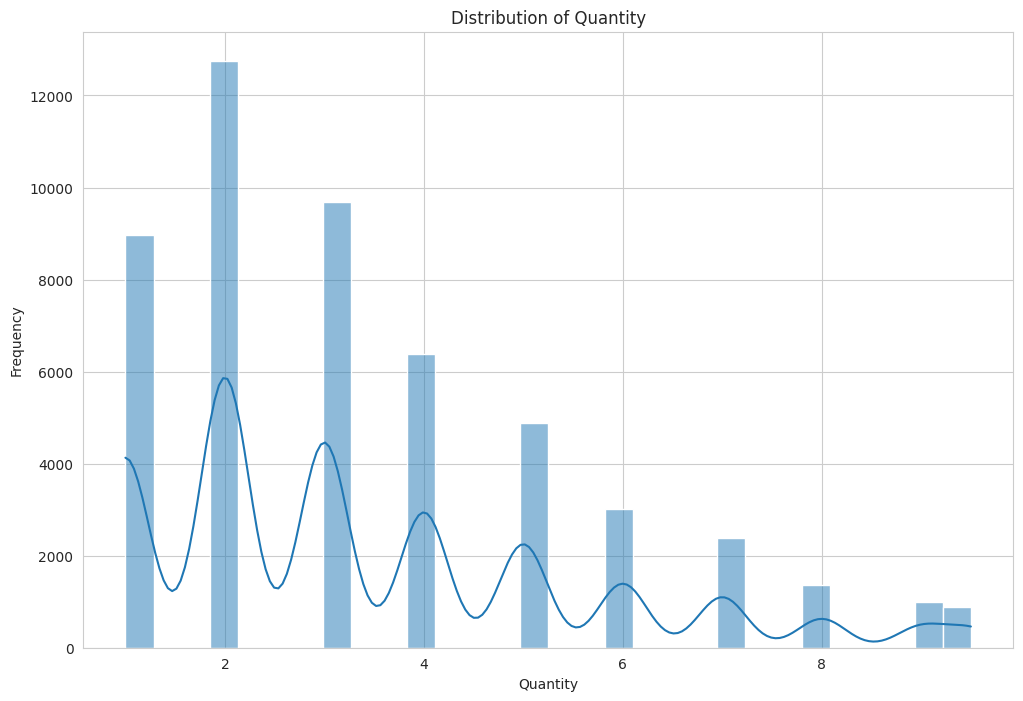

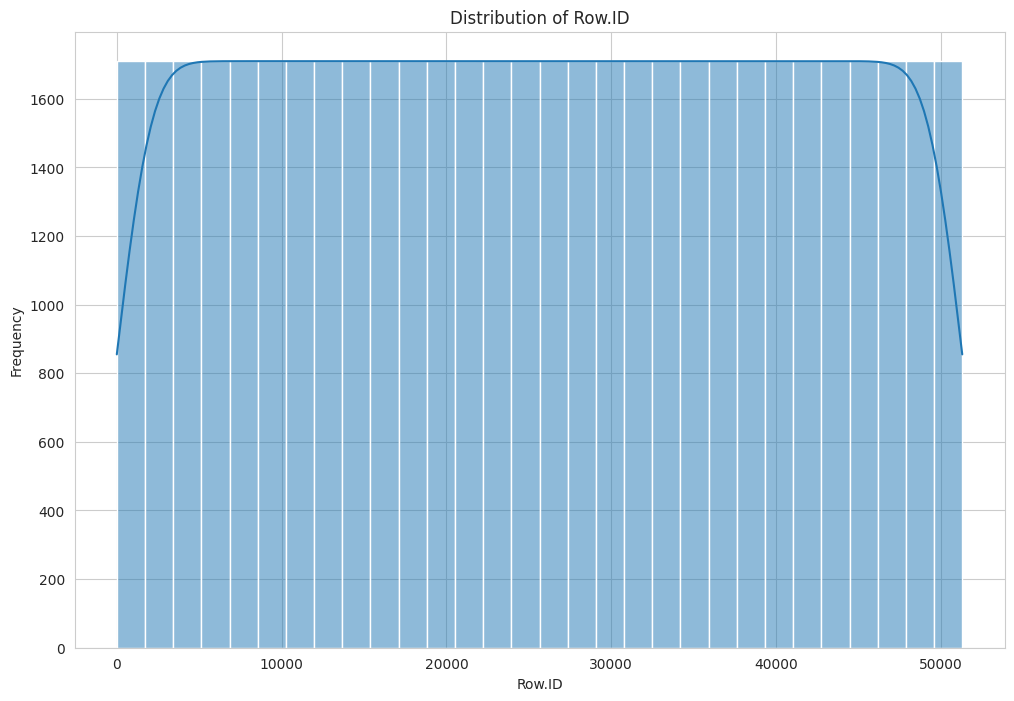

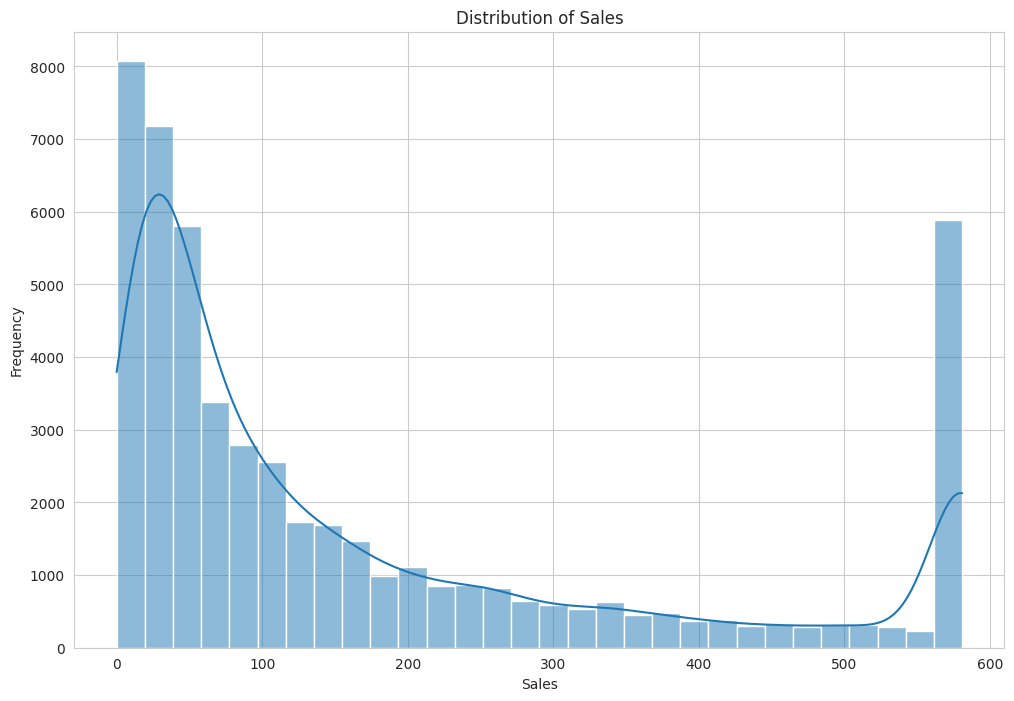

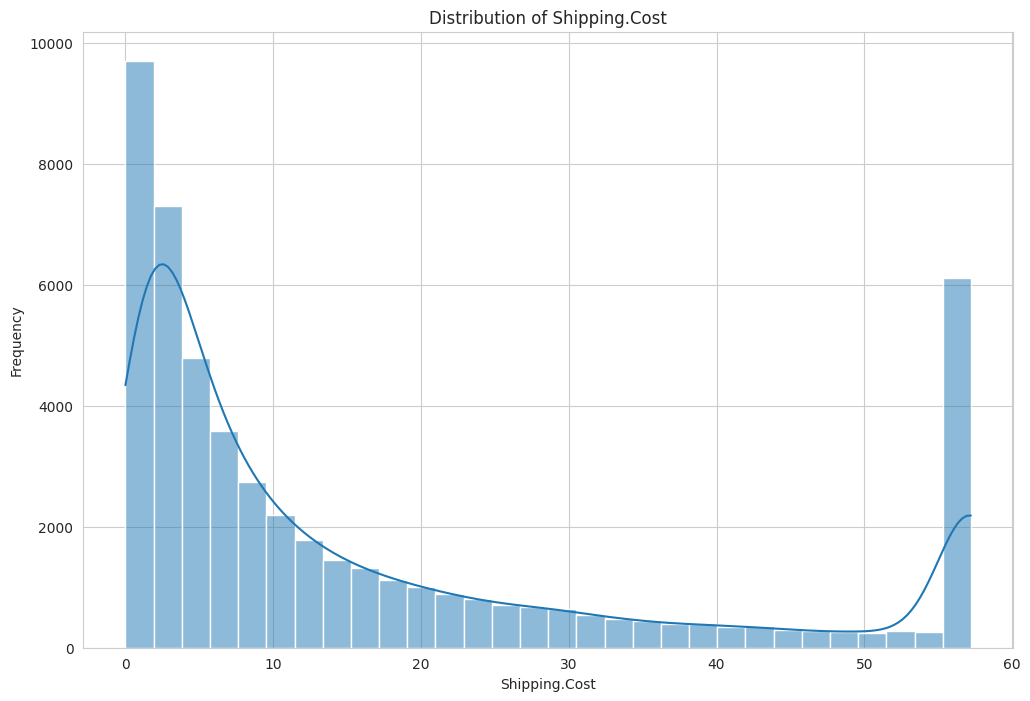

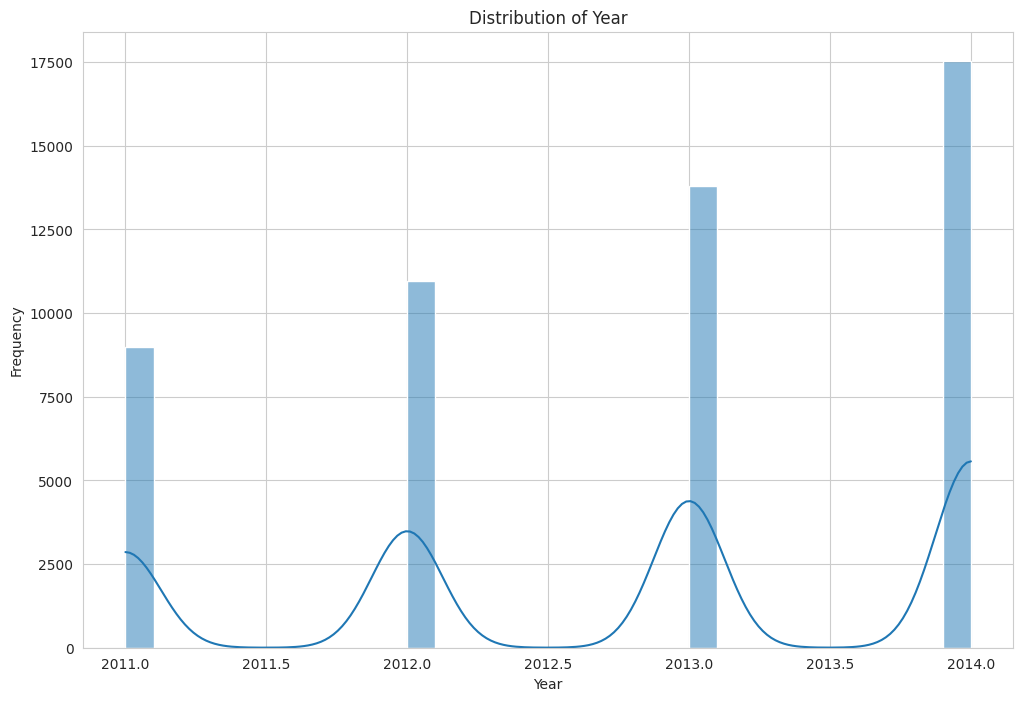

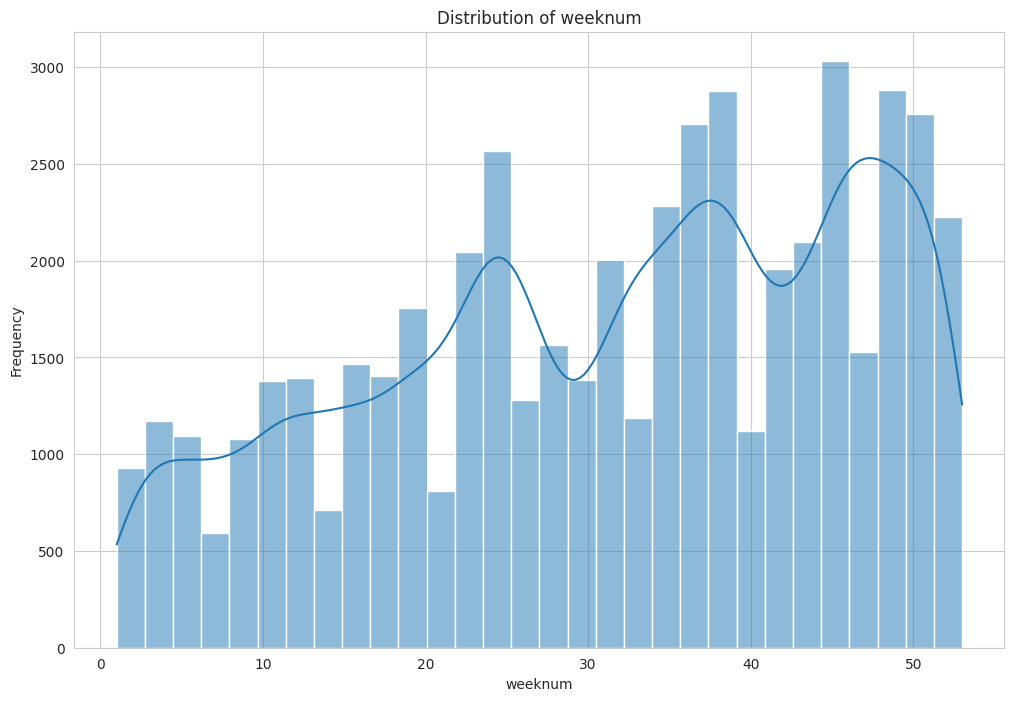


Generating Boxplots (after outlier capping)...


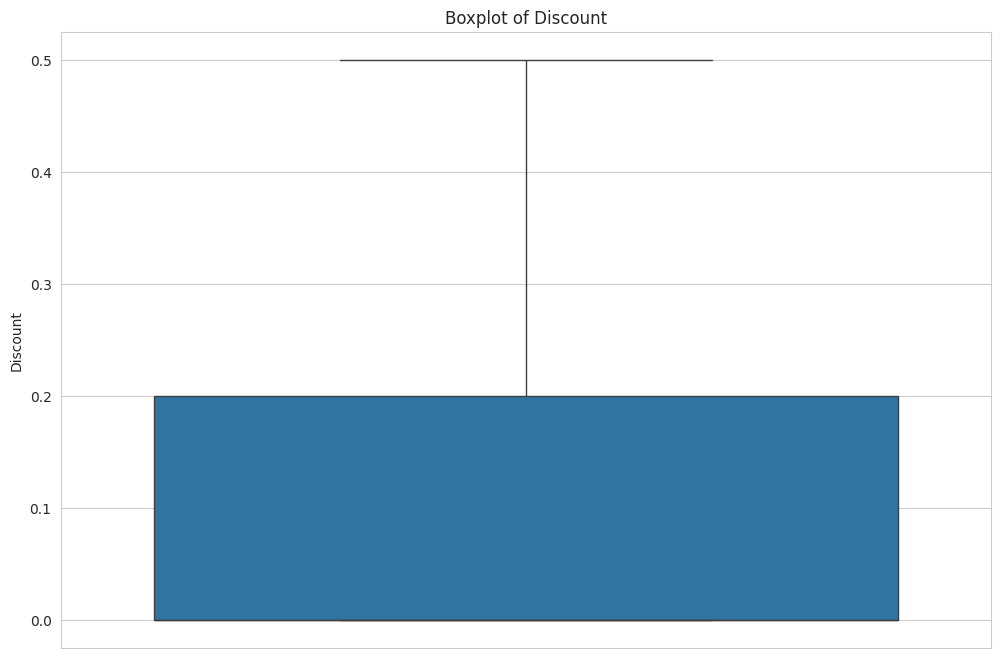

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


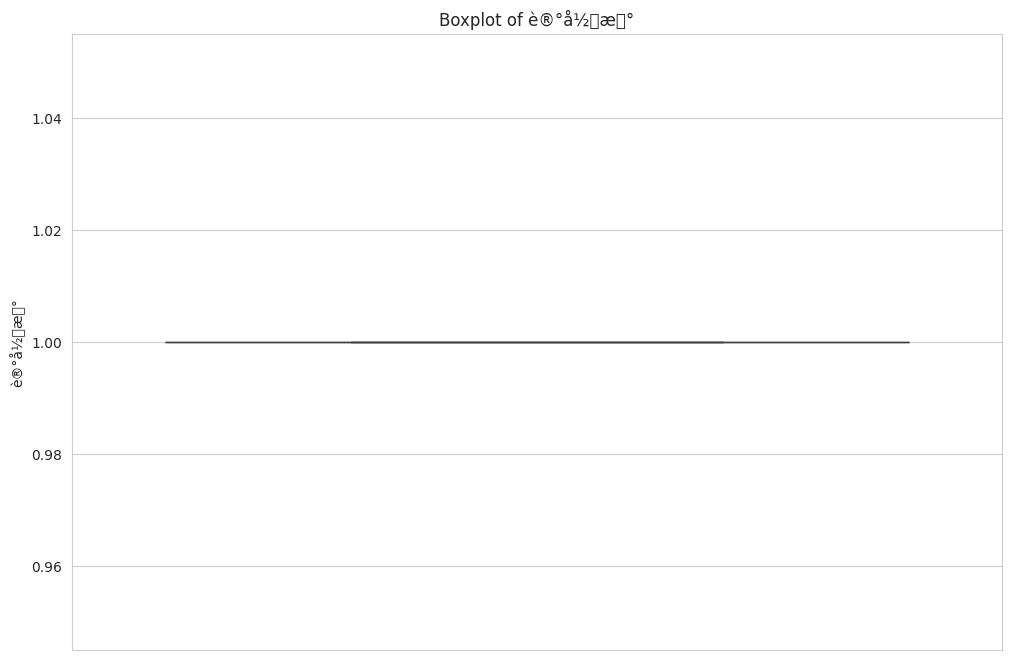

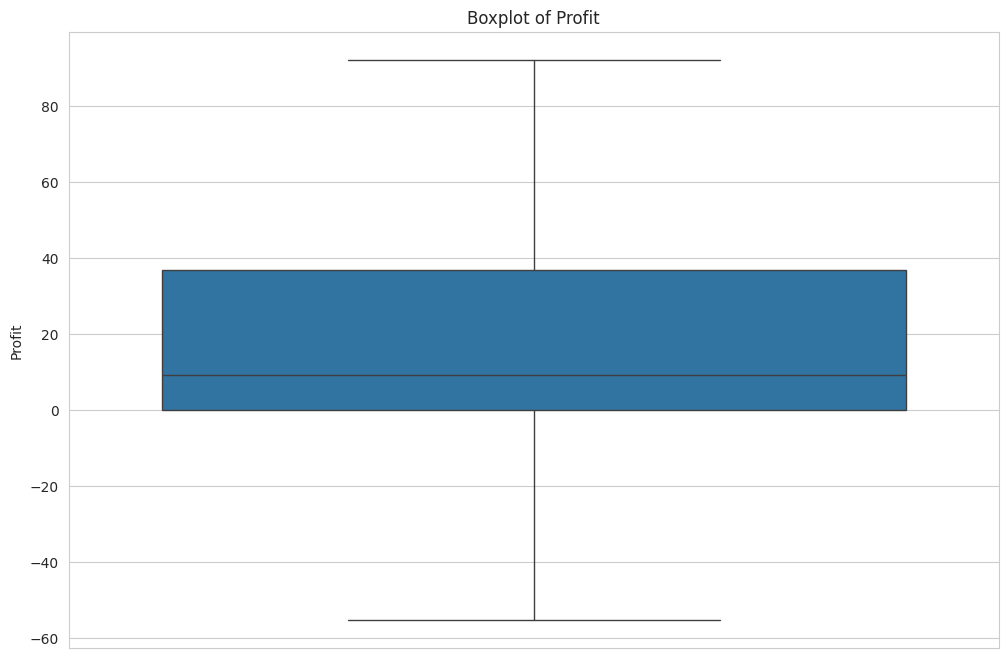

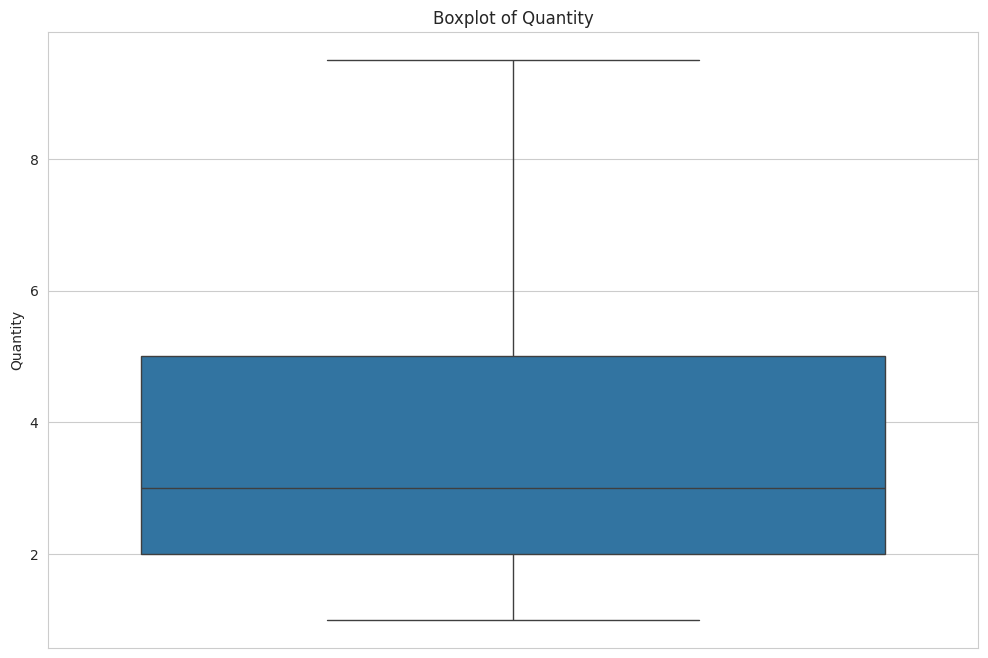

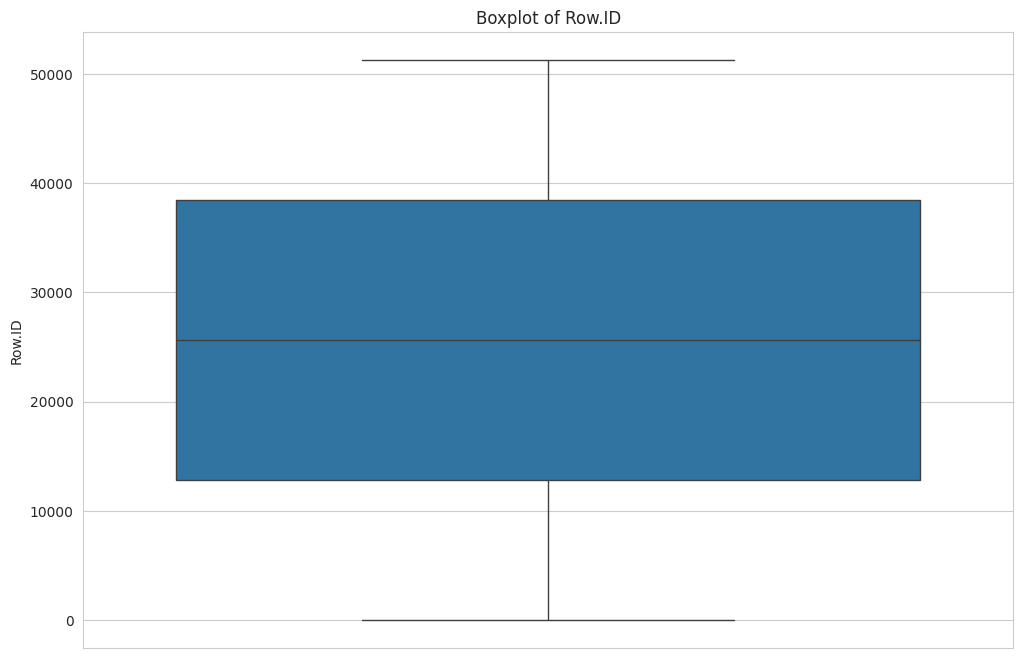

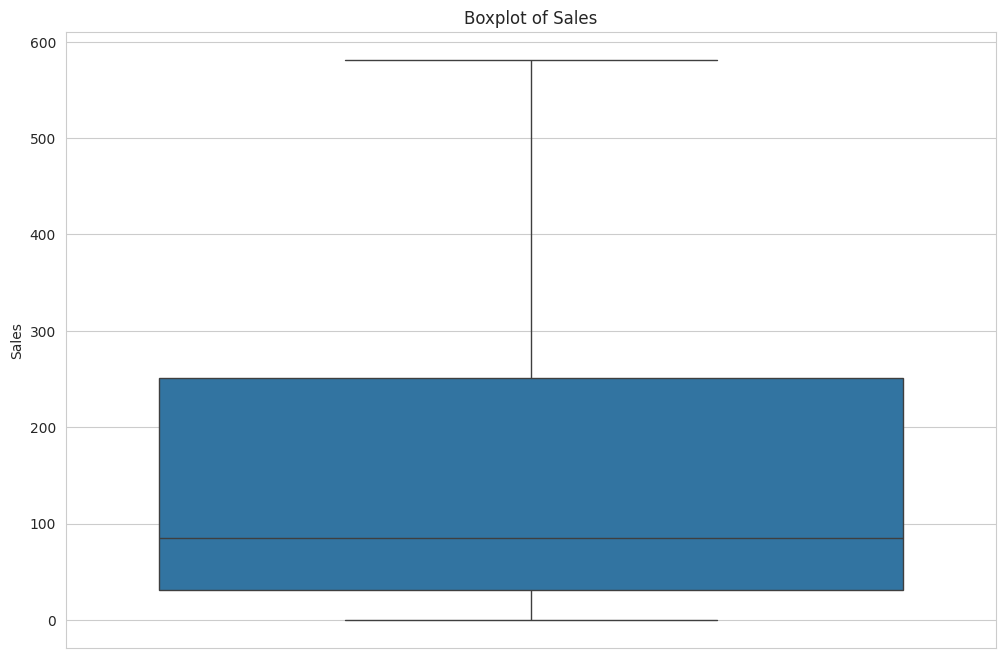

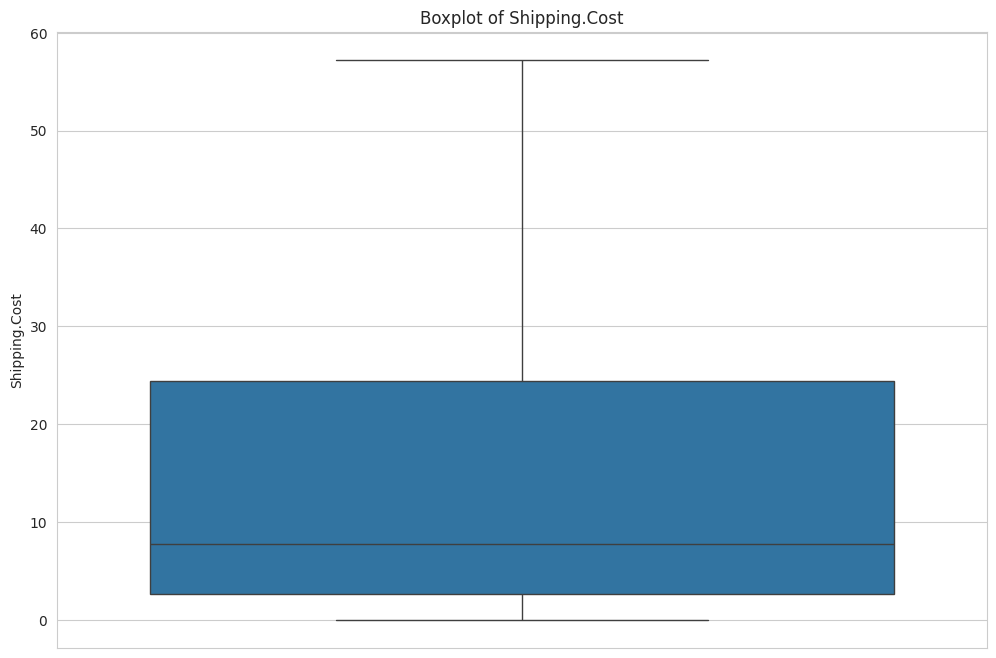

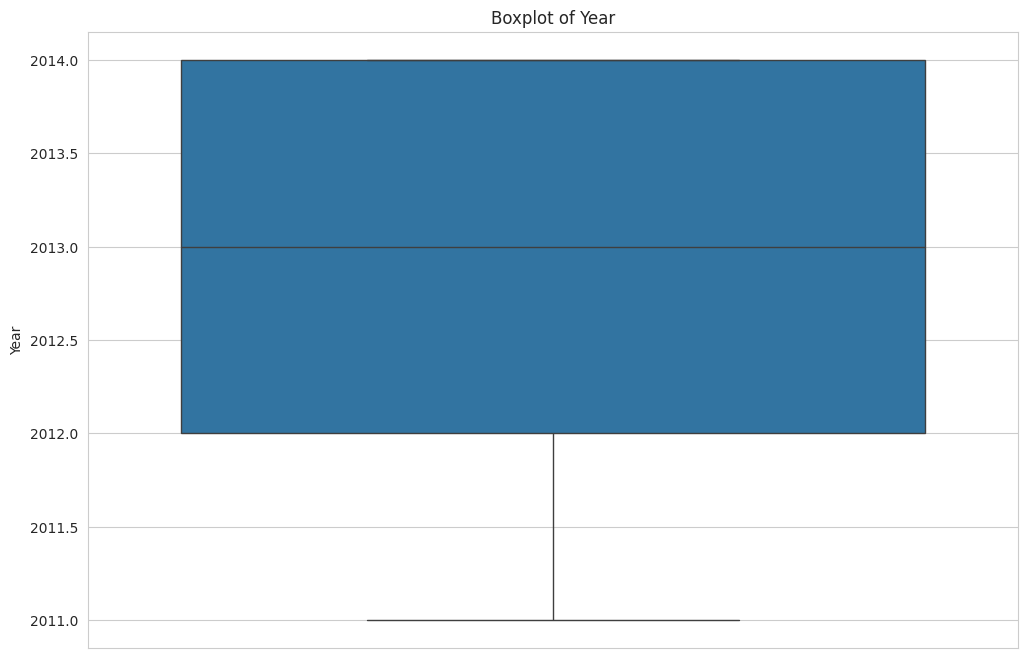

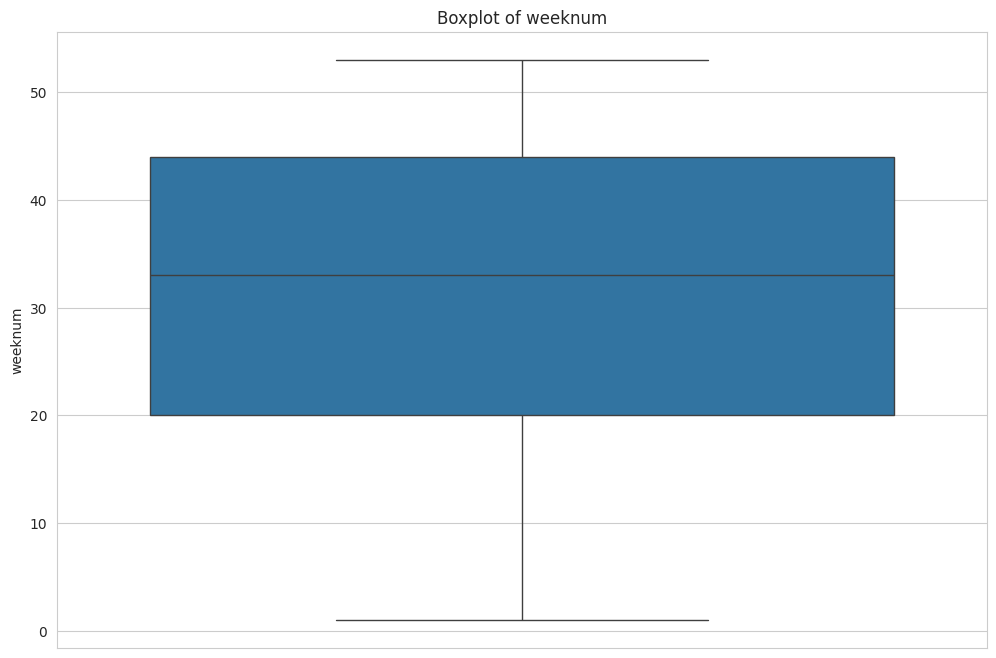


Generating Correlation Heatmap...


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 149 (\x95) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


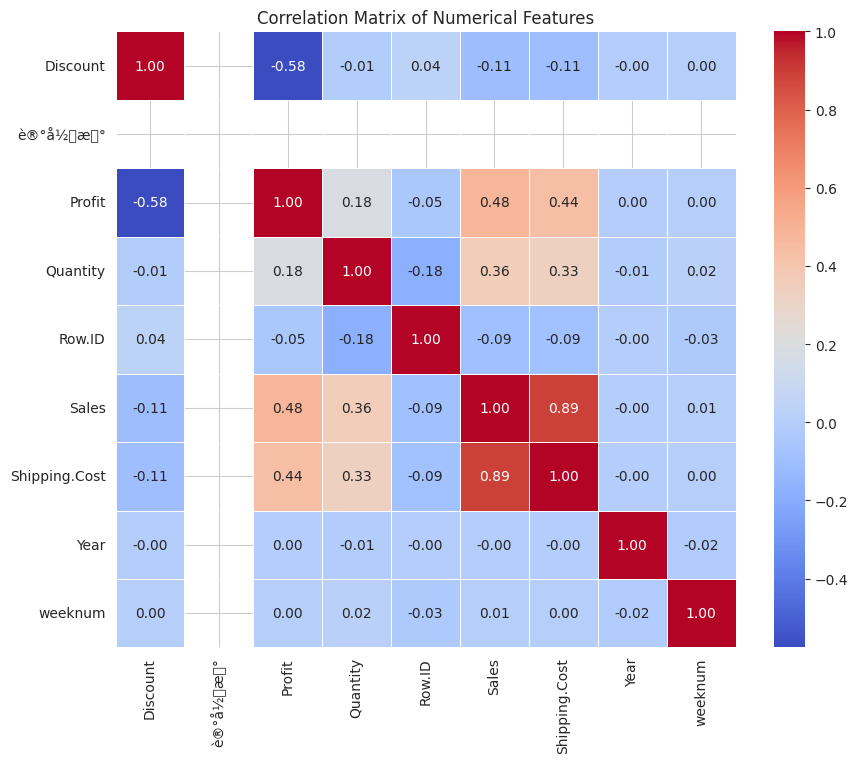


Generating Sales and Profit by Region Bar Plots...


<ipython-input-1-f9df593deaaa>:110: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
<ipython-input-1-f9df593deaaa>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')


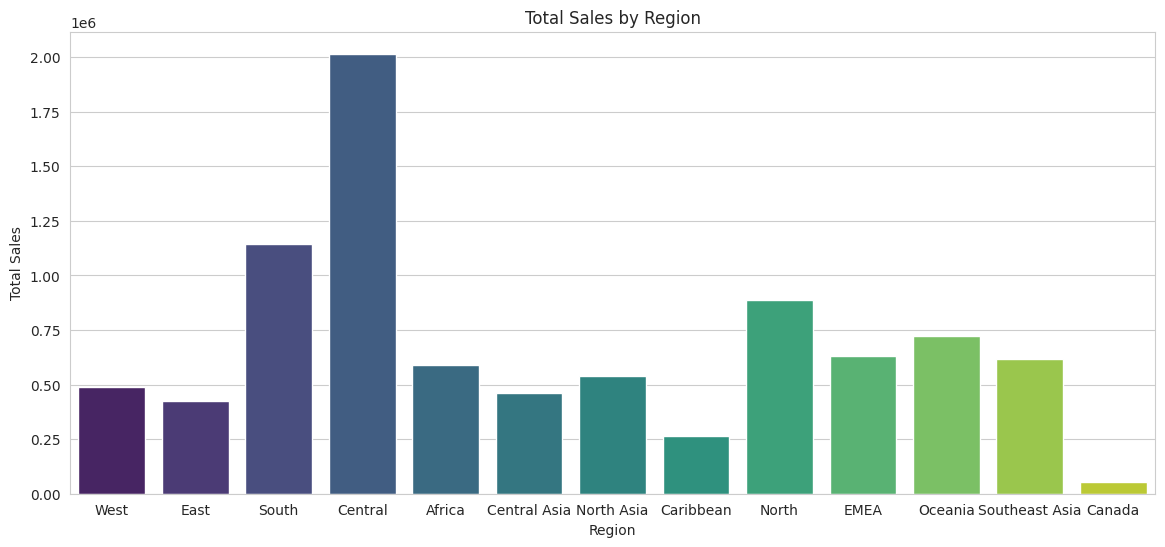

<ipython-input-1-f9df593deaaa>:117: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='plasma')
<ipython-input-1-f9df593deaaa>:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='plasma')


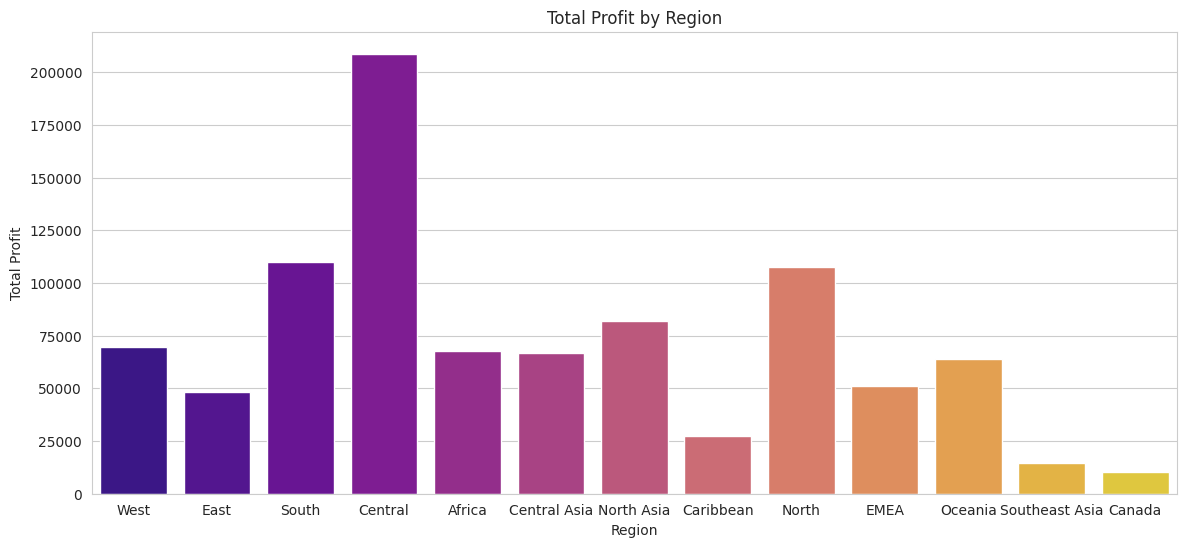


Generating Sales and Profit by Product Category Bar Plots...


<ipython-input-1-f9df593deaaa>:125: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='magma')
<ipython-input-1-f9df593deaaa>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='magma')


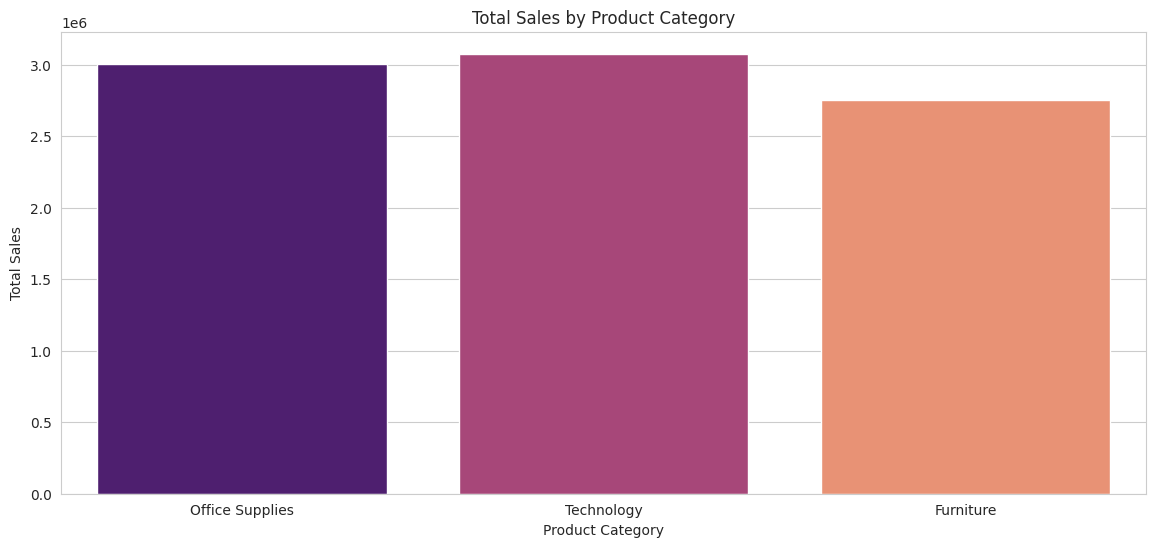

<ipython-input-1-f9df593deaaa>:132: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='cividis')
<ipython-input-1-f9df593deaaa>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='cividis')


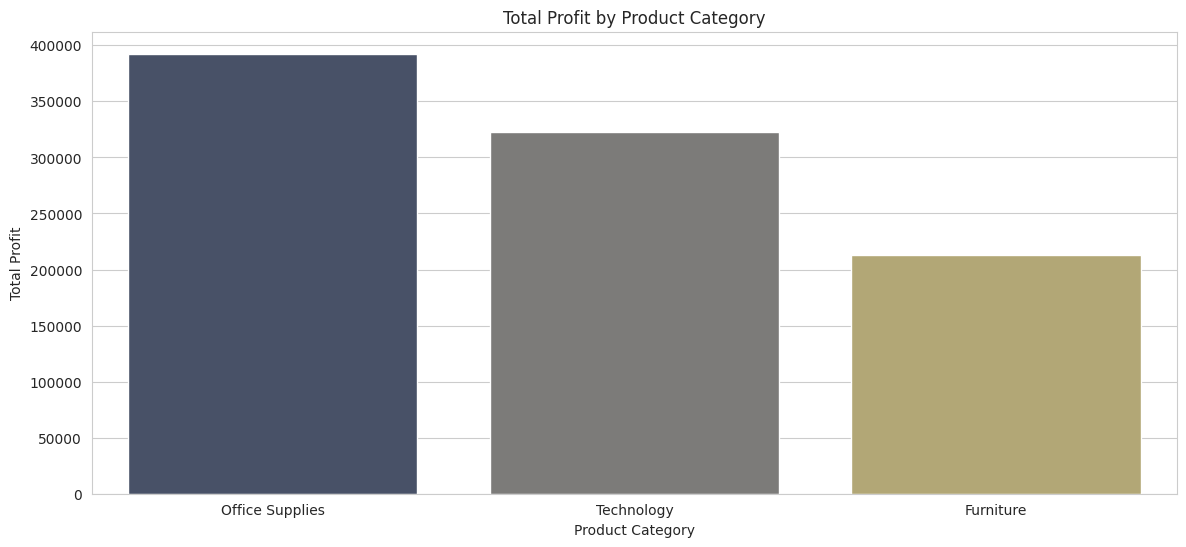


Generating Sales vs Profit Scatter Plot...


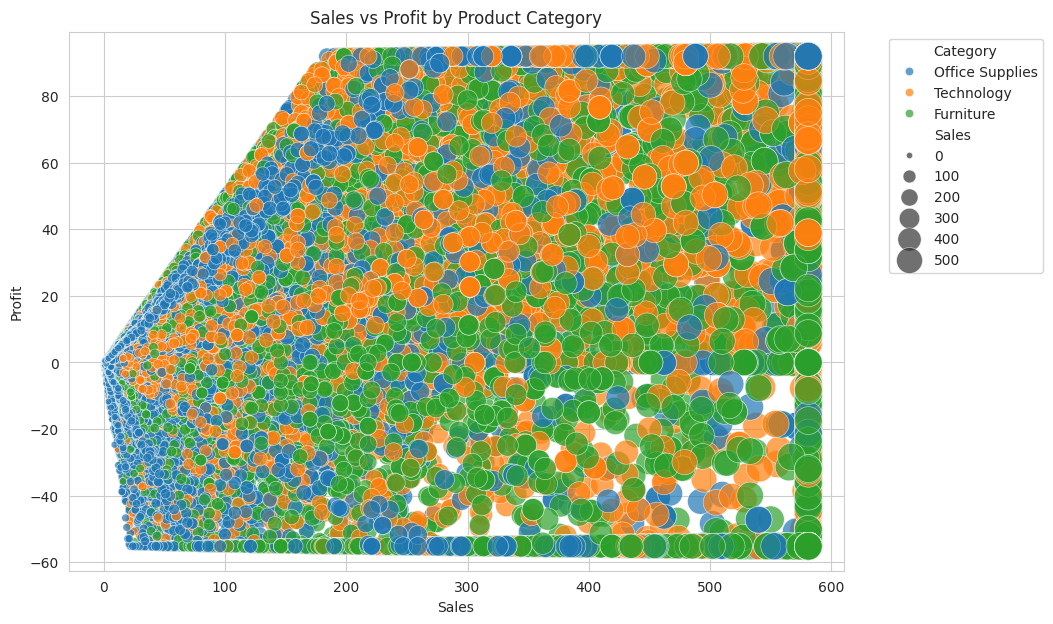


--- EDA Complete ---
The cleaned dataset is now stored in the 'df' DataFrame.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('superstore.csv', encoding='latin1')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'superstore.csv' not found. Please ensure the file is in the correct directory.")
    print("Exiting EDA process.")
    exit()

print("\n--- Initial Data Overview ---")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print("\nColumn information:")
df.info()

print("\n--- Data Cleaning ---")

print("\nChecking for missing values before handling:")
print(df.isnull().sum())

numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")

for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna('Unknown', inplace=True)
        print(f"Filled missing values in '{col}' with 'Unknown'")

print("\nMissing values after handling:")
print(df.isnull().sum())

initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_duplicates = df.shape[0]
print(f"\nRemoved {initial_rows - rows_after_duplicates} duplicate rows.")
print(f"Dataset shape after removing duplicates: {df.shape}")

print("\nDetecting and handling outliers (using IQR method, capping outliers)...")

numerical_cols_for_outliers = df.select_dtypes(include=np.number).columns

for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    if outliers_count > 0:
        print(f"Column '{col}': Found {outliers_count} outliers.")
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"Outliers in '{col}' have been capped.")
    else:
        print(f"Column '{col}': No significant outliers detected or handled.")

print("\n--- Data Cleaning Complete ---")
print(f"Final dataset shape after cleaning: {df.shape}")

print("\n--- Statistical Analysis ---")

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nCorrelation matrix for numerical variables:")
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

print("\n--- Data Visualization ---")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("\nGenerating Histograms...")
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("\nGenerating Boxplots (after outlier capping)...")
for col in numerical_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

print("\nGenerating Correlation Heatmap...")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\nGenerating Sales and Profit by Region Bar Plots...")
plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='plasma')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

print("\nGenerating Sales and Profit by Product Category Bar Plots...")
plt.figure(figsize=(14, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='magma')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='cividis')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()

print("\nGenerating Sales vs Profit Scatter Plot...")
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category', size='Sales', sizes=(20, 400), alpha=0.7)
plt.title('Sales vs Profit by Product Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("\n--- EDA Complete ---")
print("The cleaned dataset is now stored in the 'df' DataFrame.")
